# Reserach data 
### Additional Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Import Data

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
# Preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [35]:


bank_data = pd.read_csv("Data/bank-additional/bank-additional/bank-additional.csv", delimiter=";") #all examples 100%

display(bank_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### Data Prep

In [36]:

#'
## PP target
#bank_target = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)
#bank_train = bank_data.drop(columns='y')
#
#
#
##preperations for future pipelines
#numerical_features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
#categorical_features = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
#
#
#numerical_transformer = Pipeline(steps=[
#    ('scaler', StandardScaler())
#])
#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])
#
##preprocessor
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numerical_transformer, numerical_features),
#        ('cat', categorical_transformer, categorical_features) 
#    ]
#)
#
#
#
#
#bank_encoded = pd.DataFrame(preprocessor.fit_transform(bank_train))
#
#
#bank_encoded'
#

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
 
# PP target
bank_target = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank_train = bank_data.drop(columns='y')
 
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit_transform(bank_target) # encoded in 0 / 1
 
 
# preprocessor = preprocessing.OneHotEncoder()
estimator = KNeighborsClassifier(n_neighbors=4)
preprocessor = ColumnTransformer(
    transformers=[
        # OneHot
        ('scaler', preprocessing.MinMaxScaler(), ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']),
        # use OneHotEncoder
        ('encoder', preprocessing.OneHotEncoder(), ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']) ])
 
bank_encoded = pd.DataFrame(preprocessor.fit_transform(bank_train))
 
pipeline = Pipeline([('preprocessing', preprocessor), ('classification', estimator)])
 
bank_target


0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

### First Trys

For KNN with n = 1 Average Accuracy = 86.8173174591926% , Best Accuarcy = 88.3495145631068
For KNN with n = 1 Average Precision = 35.57175089575825% , Best Precision = 45.94594594594595
For KNN with n = 1 Average Recall = 27.01932367149758% , Best Recall = 41.30434782608695
For KNN with n = 2 Average Accuracy = 89.43926723832473% , Best Accuarcy = 90.29126213592234
For KNN with n = 2 Average Precision = 58.910533910533914% , Best Precision = 83.33333333333334
For KNN with n = 2 Average Recall = 11.531400966183575% , Best Recall = 17.77777777777778
For KNN with n = 3 Average Accuracy = 89.05079961259538% , Best Accuarcy = 90.53398058252428
For KNN with n = 3 Average Precision = 49.78893758460322% , Best Precision = 66.66666666666666
For KNN with n = 3 Average Recall = 20.381642512077295% , Best Recall = 28.26086956521739
For KNN with n = 4 Average Accuracy = 89.65765478468334% , Best Accuarcy = 90.53398058252428
For KNN with n = 4 Average Precision = 63.48268398268399% , Best Precision 

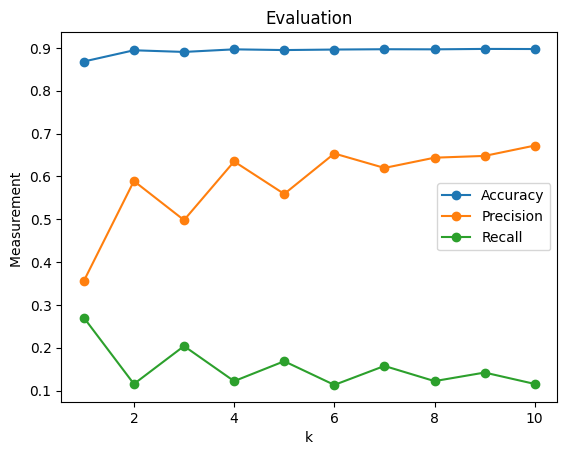

In [37]:
#General approach with Model evaluation.. Recall or Precision?
#F1 & accuracy always, we can include a cost example for r & p
#r: how many potential customers to I miss (which were actually using the account)
#p: What percentage of the selected customers actually use an account like that



k_l = []
for i in range(10):
    k_l.append(i+1)

accuracy_scores = []
recall_scores = []
precision_scores = []

for k in k_l:
    estimator = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("For KNN with n = {} Average Accuracy = {}% , Best Accuarcy = {}".format(k, accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='precision')
    print("For KNN with n = {} Average Precision = {}% , Best Precision = {}".format(k, precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='recall')
    print("For KNN with n = {} Average Recall = {}% , Best Recall = {}".format(k, recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(k_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(k_l, precision_scores, marker='o', label="Precision")
plt.plot(k_l, recall_scores, marker='o', label="Recall")
plt.xlabel('k')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()

### Try Decision Trees

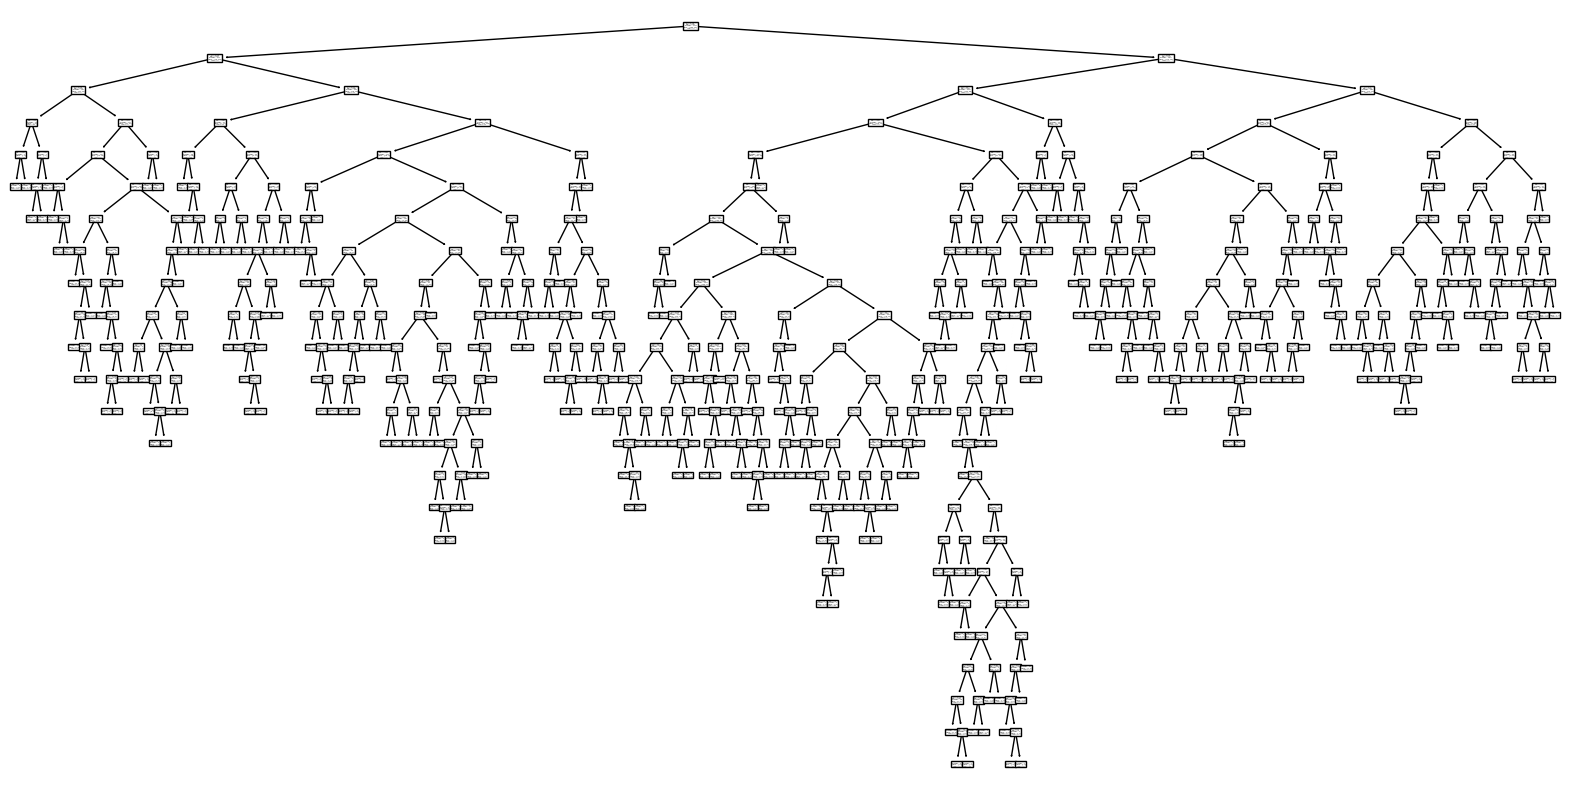

Average Accuracy = 88.37006590603076% , Best Accuarcy = 90.0485436893204
Average Precision = 48.710465740477204% , Best Precision = 58.333333333333336
Average Recall = 47.850241545893724% , Best Recall = 67.3913043478261


In [38]:
dt = DecisionTreeClassifier()
dt.fit(bank_encoded, bank_target)

plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               feature_names=bank_encoded.columns,
               class_names=['no','yes'])
plt.show()

dt = DecisionTreeClassifier()
accuracy = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='accuracy')
print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))

precision = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='precision')
print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))

recall = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='recall')
print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))



DT with Depth 3


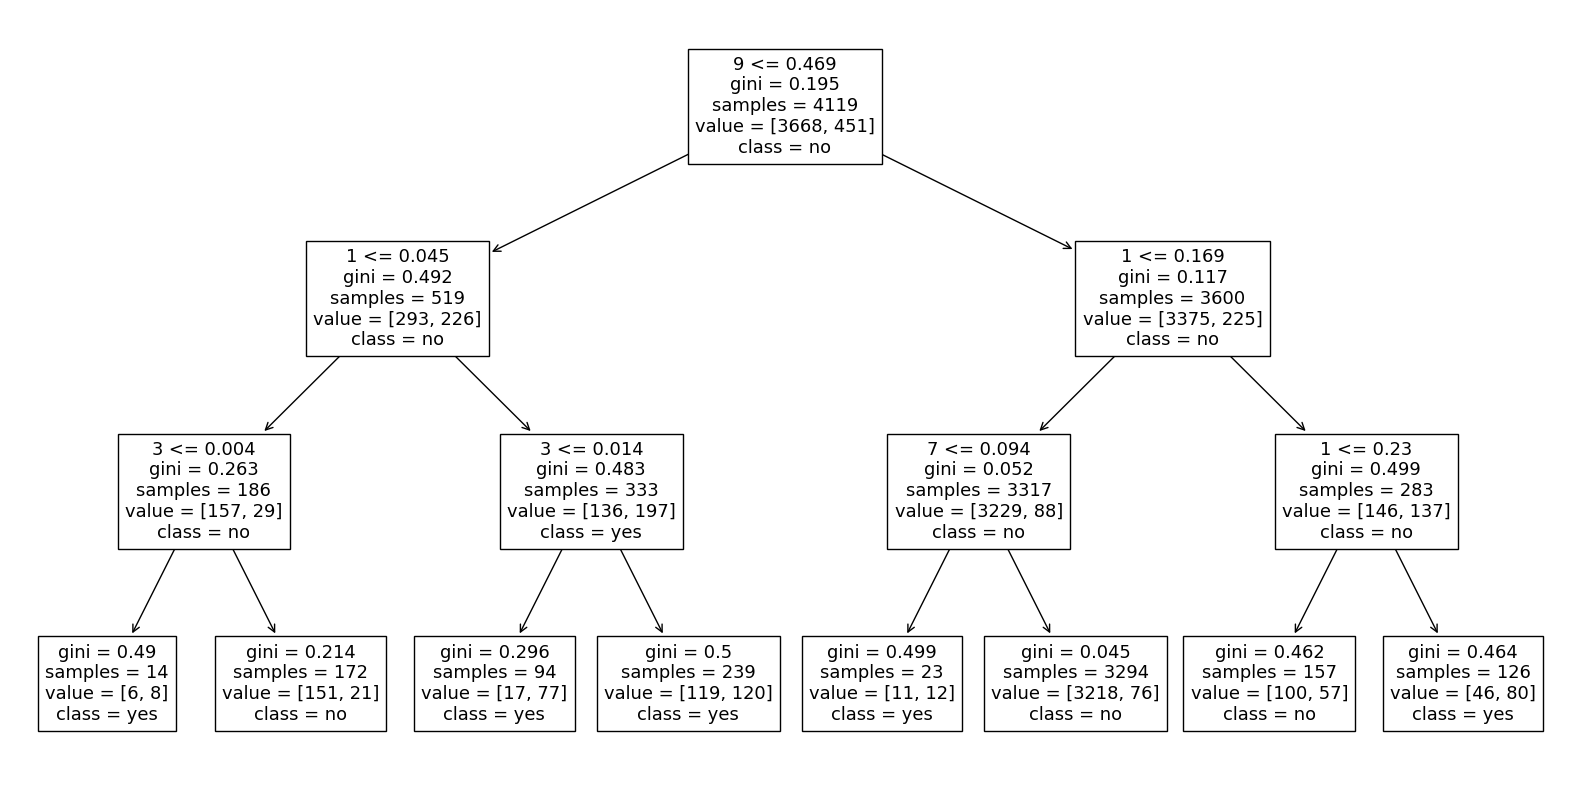

Average Accuracy = 90.65339097158245% , Best Accuarcy = 91.97080291970804
Average Precision = 58.70222056231829% , Best Precision = 67.85714285714286
Average Recall = 53.24154589371981% , Best Recall = 66.66666666666666

DT with Depth 4


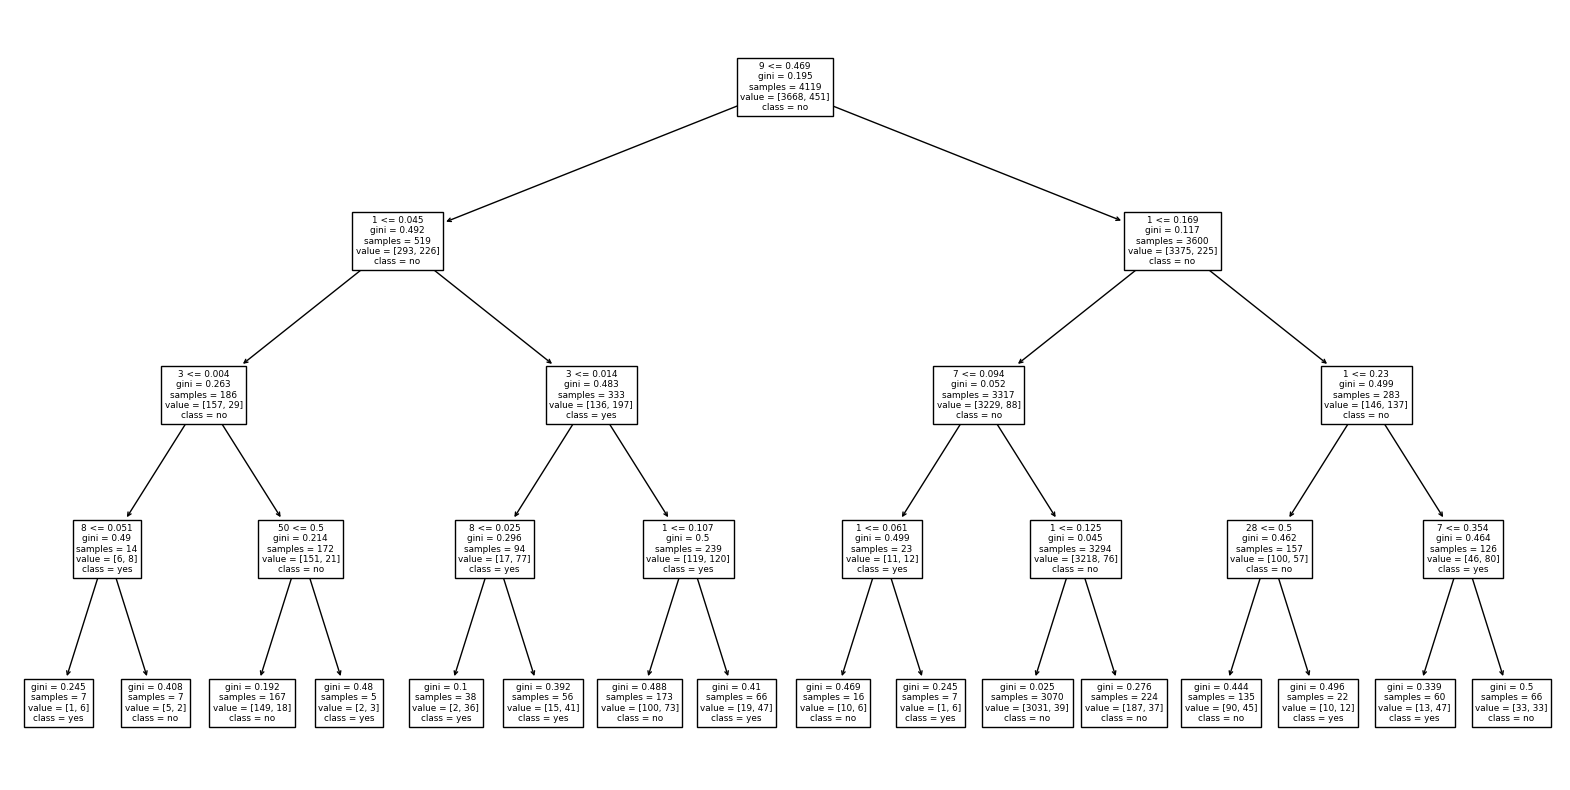

Average Accuracy = 90.65303663808375% , Best Accuarcy = 91.74757281553399
Average Precision = 62.77118736383442% , Best Precision = 70.0
Average Recall = 39.0% , Best Recall = 62.22222222222222

DT with Depth 5


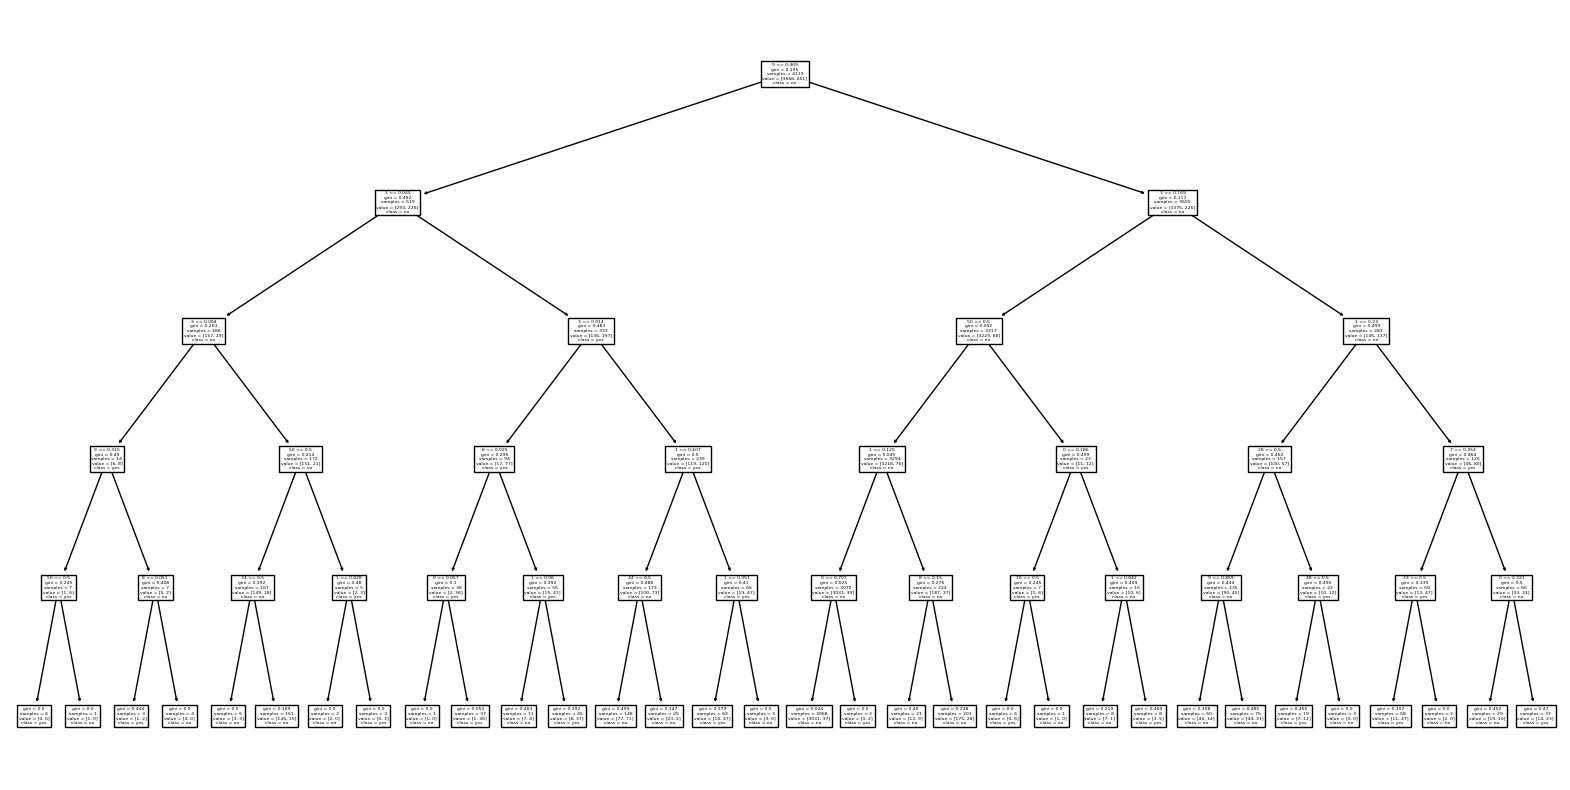

Average Accuracy = 90.96886589658186% , Best Accuarcy = 91.99029126213593
Average Precision = 62.76351290789523% , Best Precision = 73.91304347826086
Average Recall = 44.54106280193236% , Best Recall = 60.0

DT with Depth 6


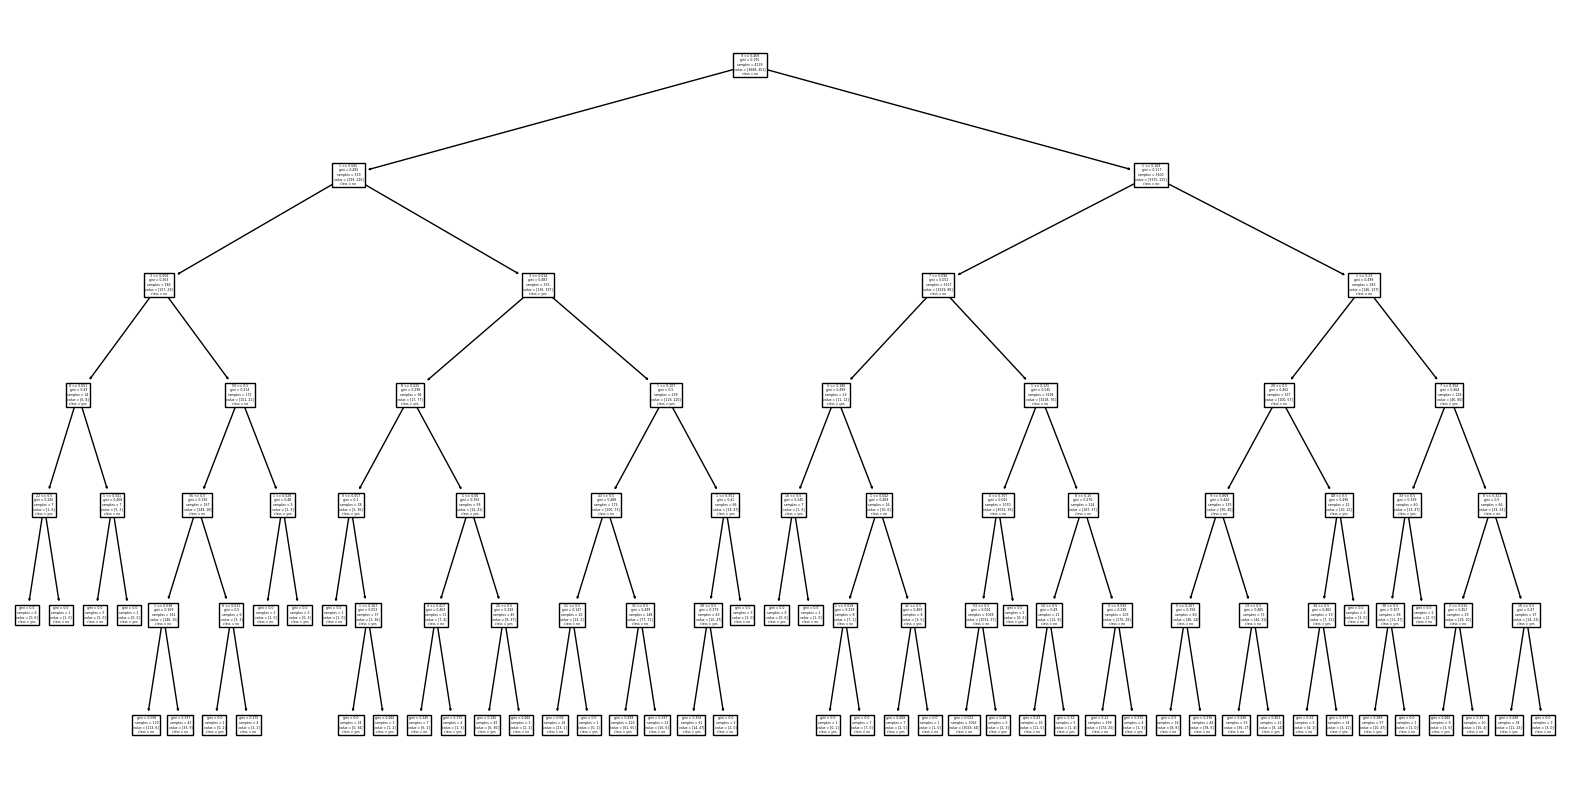

Average Accuracy = 90.33726643516879% , Best Accuarcy = 91.99029126213593
Average Precision = 57.86198054100867% , Best Precision = 65.71428571428571
Average Recall = 44.111111111111114% , Best Recall = 51.11111111111111

DT with Depth 7


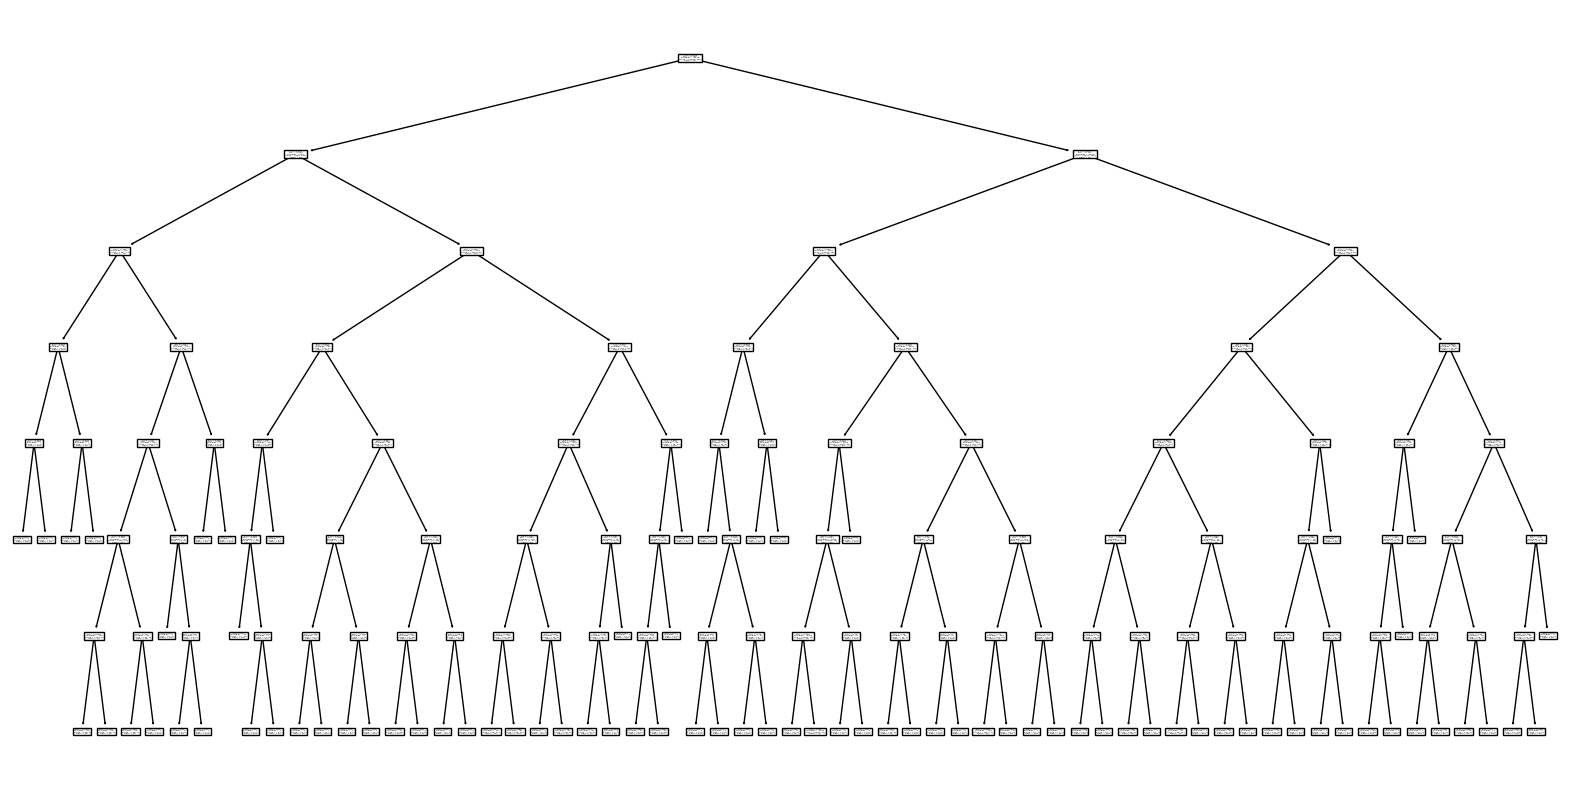

Average Accuracy = 90.57974865943827% , Best Accuarcy = 92.47572815533981
Average Precision = 58.37869205619489% , Best Precision = 65.9090909090909
Average Recall = 46.966183574879224% , Best Recall = 65.21739130434783


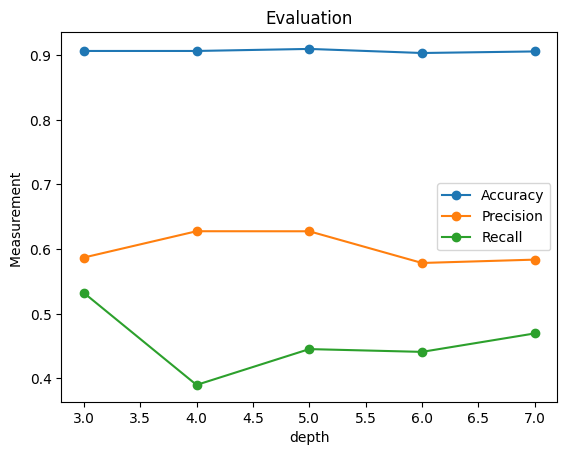

In [39]:
i_l = []
for i in range(5):
    i_l.append(i+3)

accuracy_scores = []
recall_scores = []
precision_scores = []

for i in i_l:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(bank_encoded, bank_target)

    print("")
    print("DT with Depth " + str(i))

    plt.figure(figsize=(20,10))
    tree.plot_tree(dt,
                feature_names=bank_encoded.columns,
                class_names=['no','yes'])
    plt.show()

    dt = DecisionTreeClassifier(max_depth=i)
    accuracy = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='precision')
    print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='recall')
    print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(i_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(i_l, precision_scores, marker='o', label="Precision")
plt.plot(i_l, recall_scores, marker='o', label="Recall")
plt.xlabel('depth')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()


DownSampling DecisionTree :

In [40]:
i_l = []
for i in range(5):
    i_l.append(i+3)

accuracy_scores = []
recall_scores = []
precision_scores = []

for i in i_l:
    dt = DecisionTreeClassifier(max_depth=i)
    pipeline_tree = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', dt)])
    
    # Cross Validation with 10 folds
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    recall_values = []
    precision_values = []
    accuracy_values = []
    
    for train_index, test_index in cv.split(bank_train, bank_target):
        X_train, X_test = bank_train.iloc[train_index], bank_train.iloc[test_index]
        y_train, y_test = bank_target.iloc[train_index], bank_target.iloc[test_index]
        
        # under sample only train
        undersample = RandomUnderSampler(sampling_strategy='majority')
        X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
        
        # Decision Tree Classifier
        pipeline_tree.fit(X_train_under, y_train_under)
        y_pred_tree = pipeline_tree.predict(X_test)
        
        # Calculate metrics for the fold
        recall = recall_score(y_test, y_pred_tree, average='weighted')
        precision = precision_score(y_test, y_pred_tree, average='weighted')
        accuracy = accuracy_score(y_test, y_pred_tree)
        
        recall_values.append(recall)
        precision_values.append(precision)
        accuracy_values.append(accuracy)
        
    average_recall = sum(recall_values) / len(recall_values)
    average_precision = sum(precision_values) / len(precision_values)
    average_accuracy = sum(accuracy_values) / len(accuracy_values)
    
    print(f'Scores for Tree with Max Depth {i}:')
    print(f'Average Accuracy: {average_accuracy}, Max Accuracy: {max(accuracy_values)}')
    print(f'Average Precision: {average_precision}, Max Precision: {max(precision_values)}')
    print(f'Average Recall: {average_recall}, Max Recall: {max(recall_values)}')
    

ValueError: Found unknown categories ['yes'] in column 3 during transform

### Try a neural network

In [ ]:
from sklearn.neural_network import MLPClassifier 

accuracy_scores = []
recall_scores = []
precision_scores = []

for i in [100, 200, 350, 500, 1000]:
    print("")
    print("Neural Net with Max Iter " + str(i))

    neuralnet = MLPClassifier(max_iter=i, random_state=42)

    accuracy = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='precision')
    print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='recall')
    print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(i_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(i_l, precision_scores, marker='o', label="Precision")
plt.plot(i_l, recall_scores, marker='o', label="Recall")
plt.xlabel('Max Iterations')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()


In [ ]:
# import big dataset and preprocess

bank_data = pd.read_csv("Data/bank-additional/bank-additional/bank-additional-full.csv", delimiter=";") #all examples 100%

# PP target
bank_target = bank_data['y']
bank_preprocessed = bank_data.drop(columns='y')

label_encoder = preprocessing.LabelEncoder()
bank_target = label_encoder.fit_transform(bank_target) # encoded in 0 / 1

estimator = KNeighborsClassifier(n_neighbors=4)
preprocessor = ColumnTransformer(
    transformers=[
        # OneHot 
        ('scaler', preprocessing.MinMaxScaler(), ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',  'euribor3m', 'nr.employed']),
        # use OneHotEncoder
        ('encoder', preprocessing.OneHotEncoder(), ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']) ])

bank_encoded = pd.DataFrame(preprocessor.fit_transform(bank_preprocessed))

bank_encoded

neuralnet = MLPClassifier(max_iter=200, random_state=42)

accuracy = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='accuracy')
print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
accuracy_scores.append(accuracy.mean())

precision = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='precision')
print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
precision_scores.append(precision.mean())

recall = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='recall')
print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
recall_scores.append(recall.mean())

#### Neural Net with big dataset